In [86]:
%matplotlib notebook

In [206]:
import cv2
import os
import multiprocessing
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvloop import cvloop
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
import statistics

In [207]:
class_labels= {0:'Angry', 5:'Sad', 4:'Neutral', 1:'Disgust', 6:'Surprise', 2:'Fear', 3:'Happy'}

In [208]:
model=load_model("model_v6_23.hdf5")

In [209]:
def frame_downsize(frame,face_location):
    t, r, b, l = face_location
    face=cv2.resize(frame[t:b, l:r],(48, 48))
    face_image = cv2.resize(face, (48, 48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])  
    
    return face_image

In [241]:
list1=[]
cap = cv2.VideoCapture('/home/ubuntu/videos/interview_videos/videoplayback.mp4')

while(cap.isOpened()):

    ret, frame = cap.read()       
    if ret == True: 
        face_locations =face_recognition.face_locations(frame)
        for face_location in face_locations:
            face_image=frame_downsize(frame, face_location)
            list1.append(face_image)
    else:
        break

cap.release()
                                

In [ ]:
preds=[model.predict(x)[0] for x in list1]

In [12]:
labels=[class_labels[x.argmax()] for x in preds]

In [192]:
cnt,s=0,0
l=24
x=len(list1)-(l-1)
avg_preds=[]
while(cnt<x): 
#    list2.append(statistics.mode(labels[s:s+l]))   
    avg_preds.append(np.mean(preds[s:s+l],axis=0))
    s+=1
    cnt+=1
    

In [193]:
avg_labels=[class_labels[x.argmax()] for x in avg_preds]

In [194]:
avg_labels

['Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Fear',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Surprise',
 'Sur

<IPython.core.display.Javascript object>


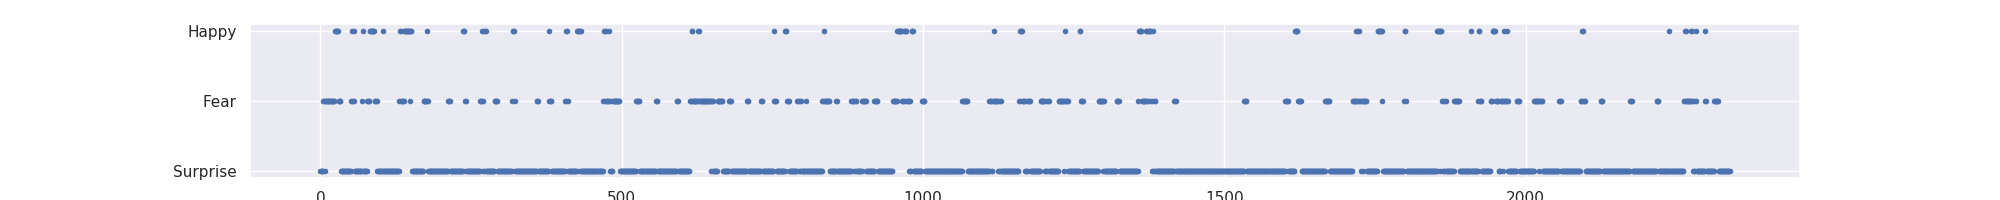

In [195]:

plt.figure(figsize=(20,2))
x=range(len(labels))
plt.scatter(x, labels, marker='.');

<IPython.core.display.Javascript object>


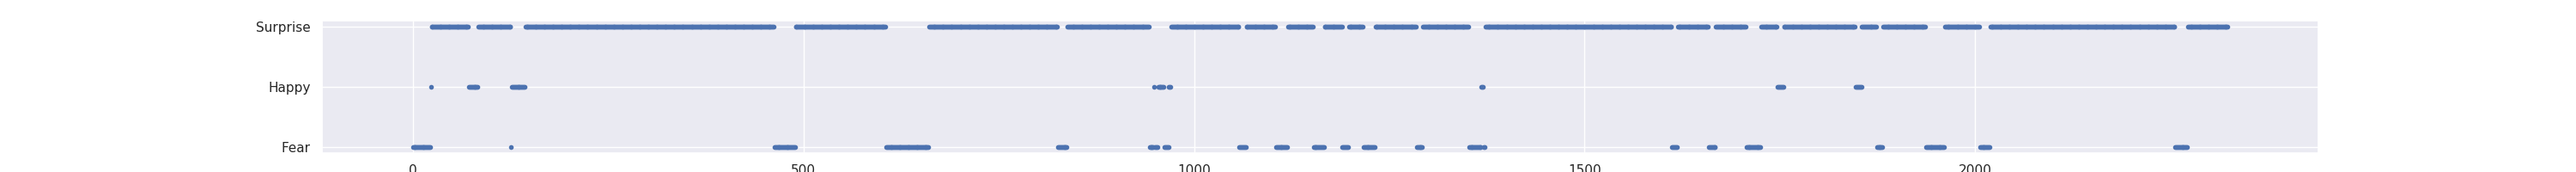

In [93]:
plt.figure(figsize=(30,2))
x=range(len(avg_labels))
plt.scatter(x, avg_labels, marker='.');

# prediction on images

In [200]:
path1='/home/ubuntu/videos/face_emotions/1/'
path2='/home/ubuntu/videos/face_emotions/2/'
path3='/home/ubuntu/videos/face_emotions/3/'
path4='/home/ubuntu/videos/face_emotions/4/'
path5='/home/ubuntu/videos/face_emotions/5/'
path6='/home/ubuntu/videos/face_emotions/6/'

In [224]:
def img_testing(path):
    
    frame = cv2.imread(path)   
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    face_locations =face_recognition.face_locations(frame)
    for face_location in face_locations:
        t, r, b, l = face_location
        face_image=cv2.resize(frame[t:b, l:r],(48, 48))
        face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1]) 
        
        cap.release()
        return face_image 

In [237]:
faces1=[img_testing(path6+x) for x in os.listdir(path6)]

In [238]:
preds=[model.predict(x)[0] for x in faces1]

In [239]:
preds

[array([2.3175168e-22, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([1.0000000e+00, 0.0000000e+00, 7.7546074e-21, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32),
 array([0.0000000e+00, 0.0000000e+00, 4.4325644e-17, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00], dtype=float32)]

In [240]:
labels=[class_labels[x.argmax()] for x in preds]
labels

['Fear', 'Angry', 'Surprise']